<a href="https://colab.research.google.com/github/rohankavari/MachineLearning/blob/main/decision_tree_mushroom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
data=pd.read_csv("/content/drive/MyDrive/dataset/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [3]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [5]:
x=data.drop(labels=['class'],axis=1).apply(LabelEncoder().fit_transform)
y=data['class']

# Making a primal tree

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[9,10,11,12],
             }

tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model2 = gsearch.best_estimator_

In [39]:
score = model2.score(X_train, y_train)
print("Train score:",score)

Train score: 1.0


In [40]:
score = model2.score(X_test, y_test)
print("Test score:",score)

Test score: 1.0


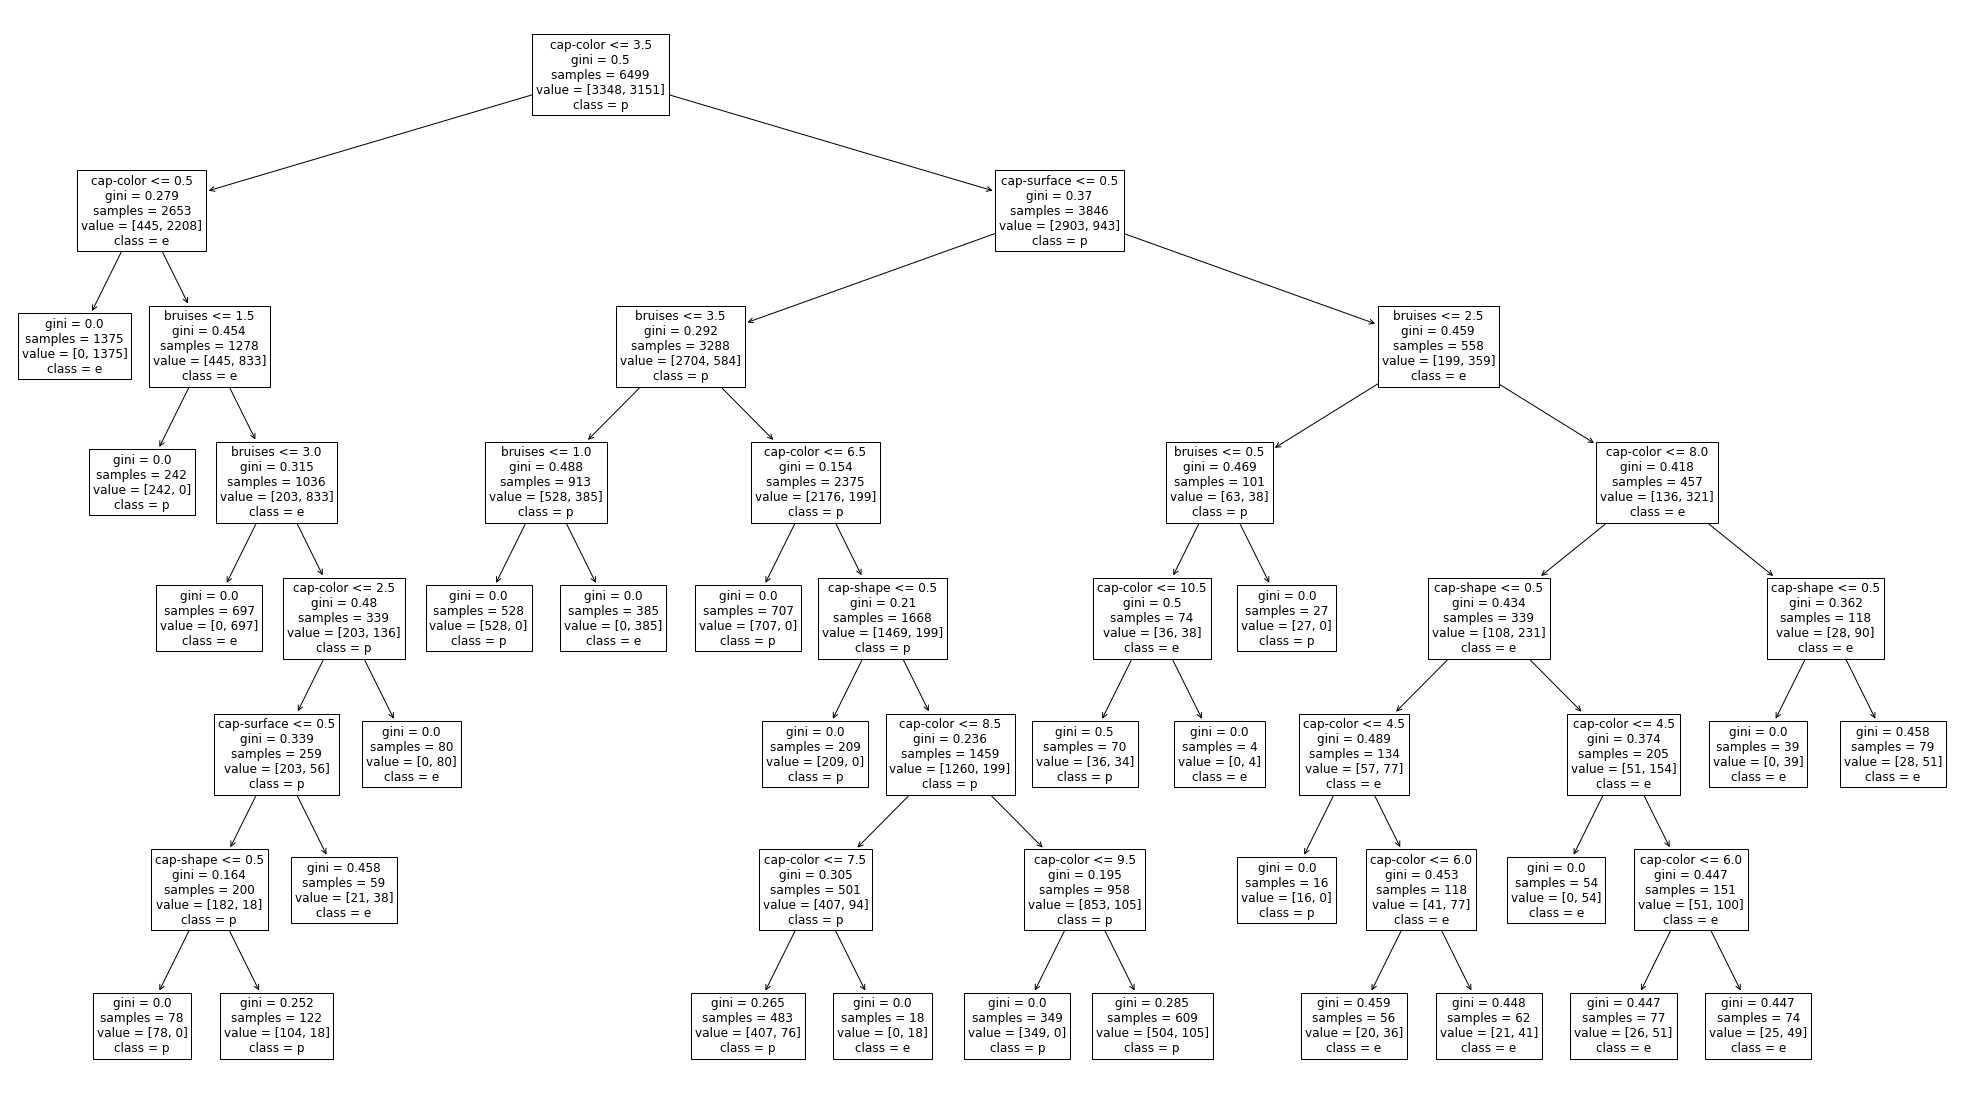

In [34]:
plt.figure(figsize=(35,20))
tree.plot_tree(model1,fontsize=12,feature_names=x.columns,class_names=['p','e'],) ;

The test and train accuracy is 1, which is alarming and our model might be overfitting the data.

# Checking for overfitting

# Selecting best features based on chi<sup> 2</sup> test.

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

Selecting 4 best features

In [6]:
test = SelectKBest(score_func=chi2, k=4)
x_best = test.fit_transform(x, y)

In [13]:
xcol=data.columns[1:]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_best, y, test_size=0.2, random_state=2)

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[9,10,11,12],
             }


tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model1 = gsearch.best_estimator_

In [8]:
score = model1.score(X_train, y_train)
print("Train score:",score)

Train score: 0.9424526850284659


In [9]:
score = model1.score(X_test, y_test)
print("Test score:",score)

Test score: 0.9569230769230769


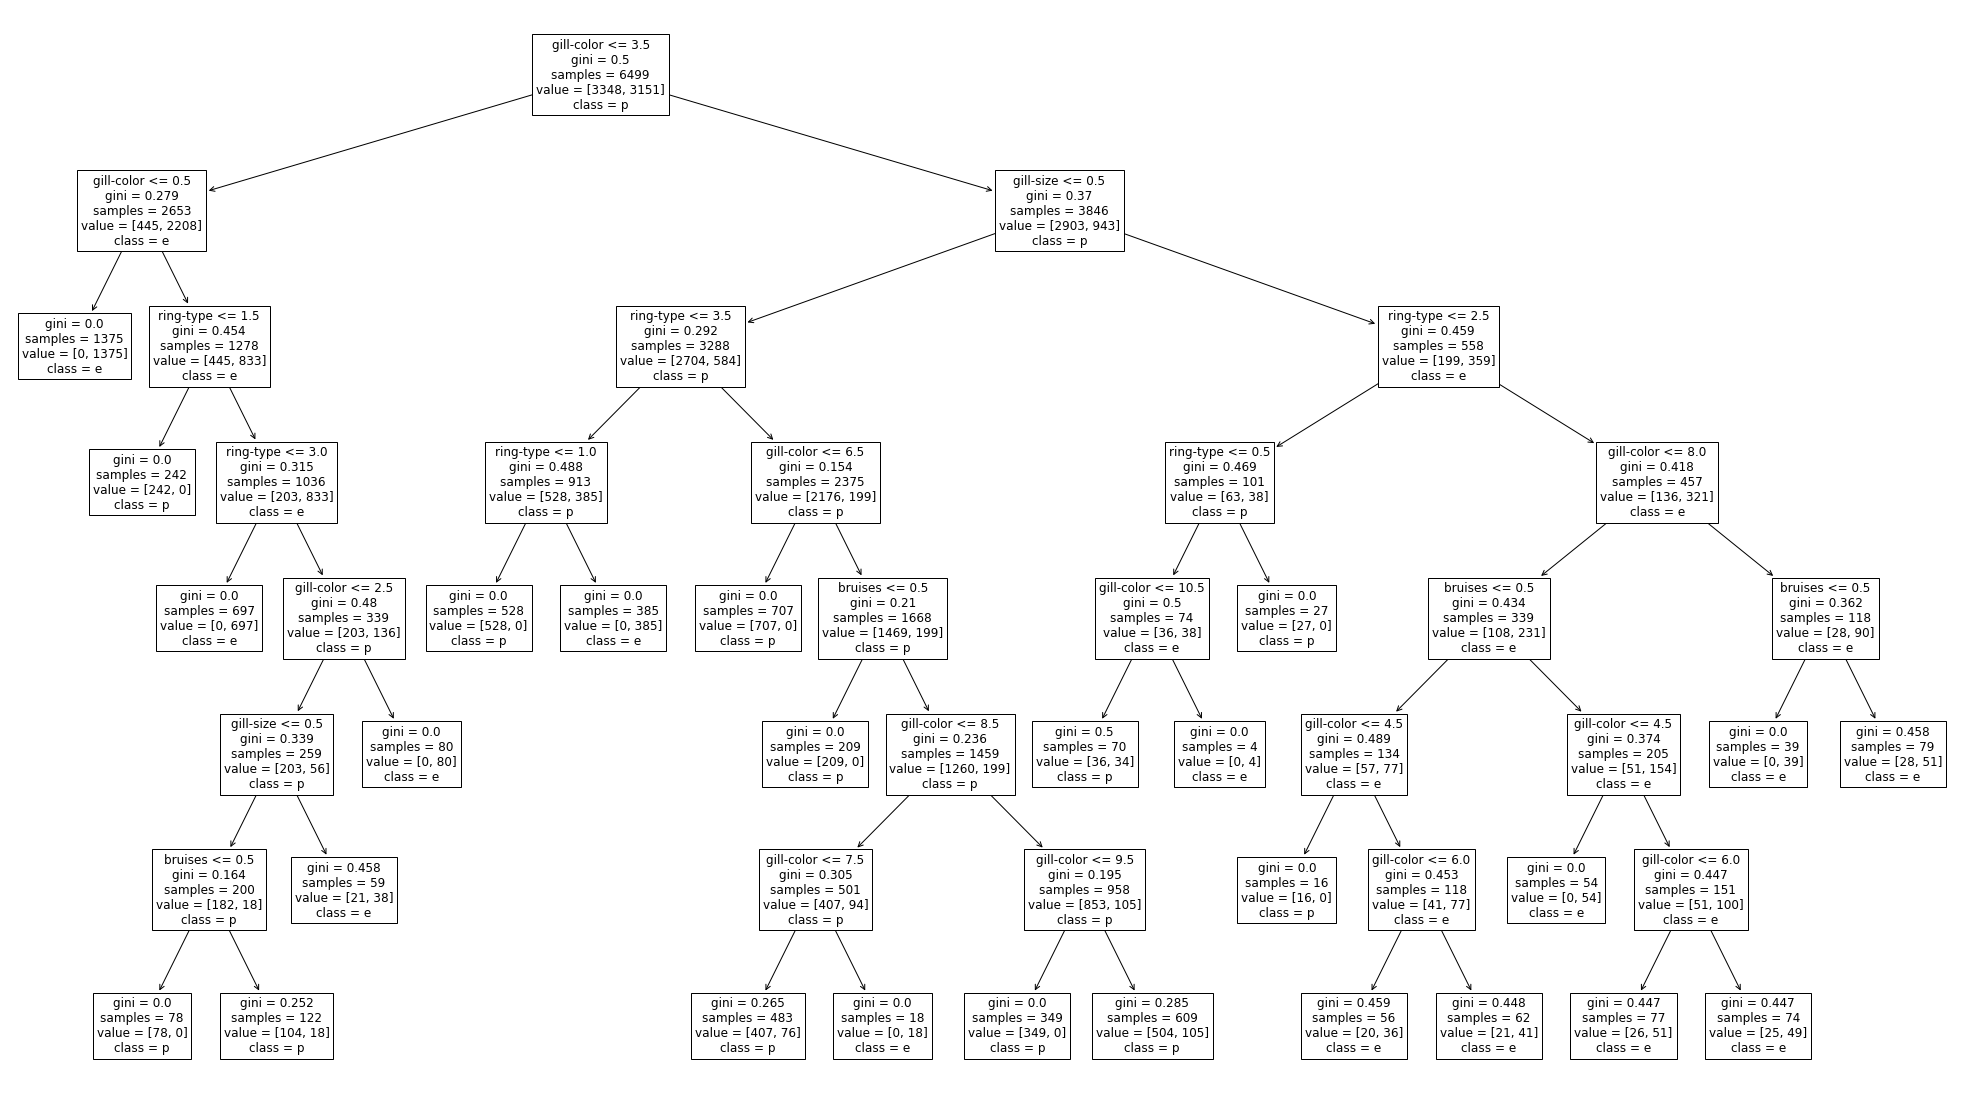

In [28]:
plt.figure(figsize=(35,20))
tree.plot_tree(model1,fontsize=12,feature_names=xcol[test.get_support()],class_names=['p','e'],) ;